# Model Building and Training

## Importing Libraries

In [1]:
import os
import sys
import shap
import pandas as pd
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import src.models as m

e:\KAIM\week8\improved-fraud-detection-week8\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Dataset

In [2]:
# Load the dataset
fraud_data_path = '../data/processed/fraud_data_processed.csv'
credit_data_path = "../data/raw/creditcard.csv"

fraud_data =  m.load_data(fraud_data_path)
credit_data =  m.load_data(credit_data_path)

## Model Preparation

In [3]:
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud =m.split_data(fraud_data, 'class')
X_train_fraud_smote_tomek, y_train_fraud_smote_tomek = m.handle_imbalanced_data(X_train_fraud, y_train_fraud)

X_train_credit, X_test_credit, y_train_credit, y_test_credit =m.split_data(credit_data, 'Class')

## Model Training

In [4]:
lr_fraud = m.train_logistic_regression(X_train_fraud_smote_tomek, y_train_fraud_smote_tomek)
xgb_fraud = m.train_xgboost(X_train_fraud_smote_tomek, y_train_fraud_smote_tomek)

lr_credit = m.train_logistic_regression(X_train_credit, y_train_credit)
xgb_credit = m.train_xgboost(X_train_credit, y_train_credit)

e:\KAIM\week8\improved-fraud-detection-week8\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluate Models

In [5]:
results_df = pd.DataFrame(columns=['Dataset', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score'])

In [6]:
results_df = m.evaluate_model(lr_fraud, X_test_fraud, y_test_fraud, results_df, 'fraud_df', 'Logistic Regression')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.51      0.65     41089
           1       0.10      0.50      0.16      4245

    accuracy                           0.51     45334
   macro avg       0.50      0.51      0.40     45334
weighted avg       0.83      0.51      0.60     45334

=== ROC AUC Score ===
ROC AUC Score: 0.5085839090823014
=== Confusion Matrix ===
[[20758 20331]
 [ 2102  2143]]


e:\KAIM\week8\improved-fraud-detection-week8\src\models.py:114: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({


In [7]:
results_df = m.evaluate_model(xgb_fraud, X_test_fraud, y_test_fraud, results_df, 'fraud_df', 'XGBoost')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       0.96      0.54      0.69      4245

    accuracy                           0.95     45334
   macro avg       0.96      0.77      0.83     45334
weighted avg       0.95      0.95      0.95     45334

=== ROC AUC Score ===
ROC AUC Score: 0.8403795765123718
=== Confusion Matrix ===
[[40990    99]
 [ 1963  2282]]


In [8]:
results_df = m.evaluate_model(lr_credit, X_test_credit, y_test_credit, results_df, 'credit_df', 'Logistic Regression')

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.70      0.72       148

    accuracy                           1.00     85443
   macro avg       0.87      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443

=== ROC AUC Score ===
ROC AUC Score: 0.9153797710014369
=== Confusion Matrix ===
[[85260    35]
 [   45   103]]


In [9]:
results_df = m.evaluate_model(xgb_credit, X_test_credit, y_test_credit, results_df, 'credit_df', 'XGBoost')

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

=== ROC AUC Score ===
ROC AUC Score: 0.9285988374211599
=== Confusion Matrix ===
[[85288     7]
 [   36   112]]


In [10]:
display(results_df)

,Dataset,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,fraud_df,Logistic Regression,0.51,0.10,0.50,0.16,0.51
1,fraud_df,XGBoost,0.95,0.96,0.54,0.69,0.84
2,credit_df,Logistic Regression,1.00,0.75,0.70,0.72,0.92
3,credit_df,XGBoost,1.00,0.94,0.76,0.84,0.93


## SHAP Analysis for Fraud Detection Model

In [11]:
explainer_fraud = shap.TreeExplainer(xgb_fraud)
shap_values_fraud = explainer_fraud.shap_values(X_test_fraud)

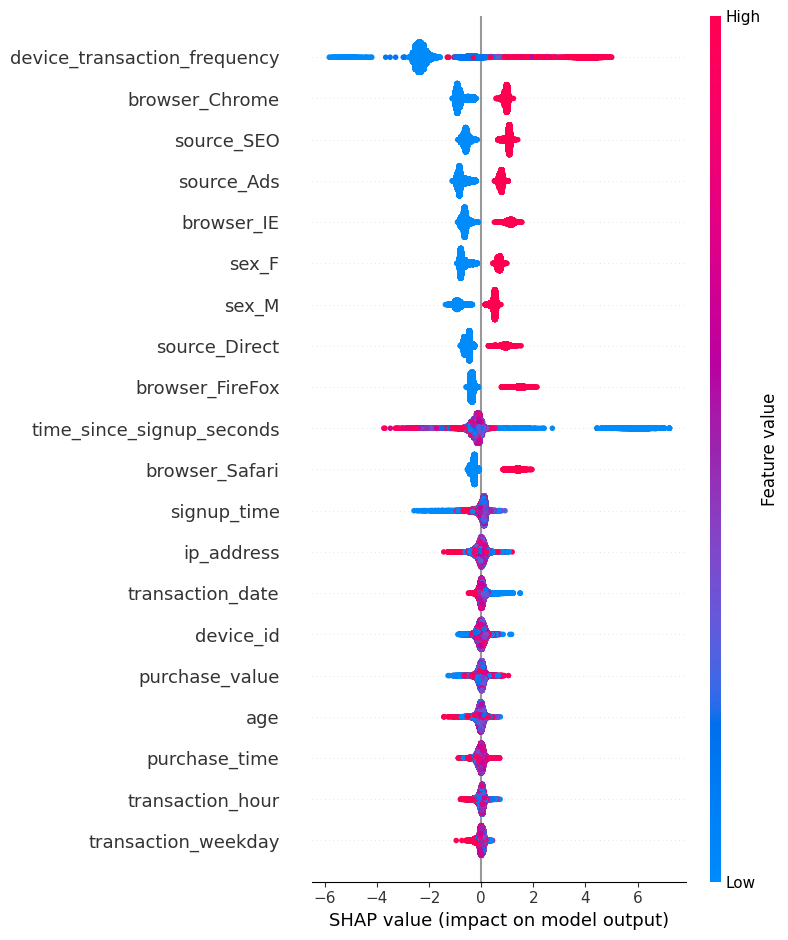

In [12]:
shap.summary_plot(shap_values_fraud, X_test_fraud, feature_names=X_test_fraud.columns)

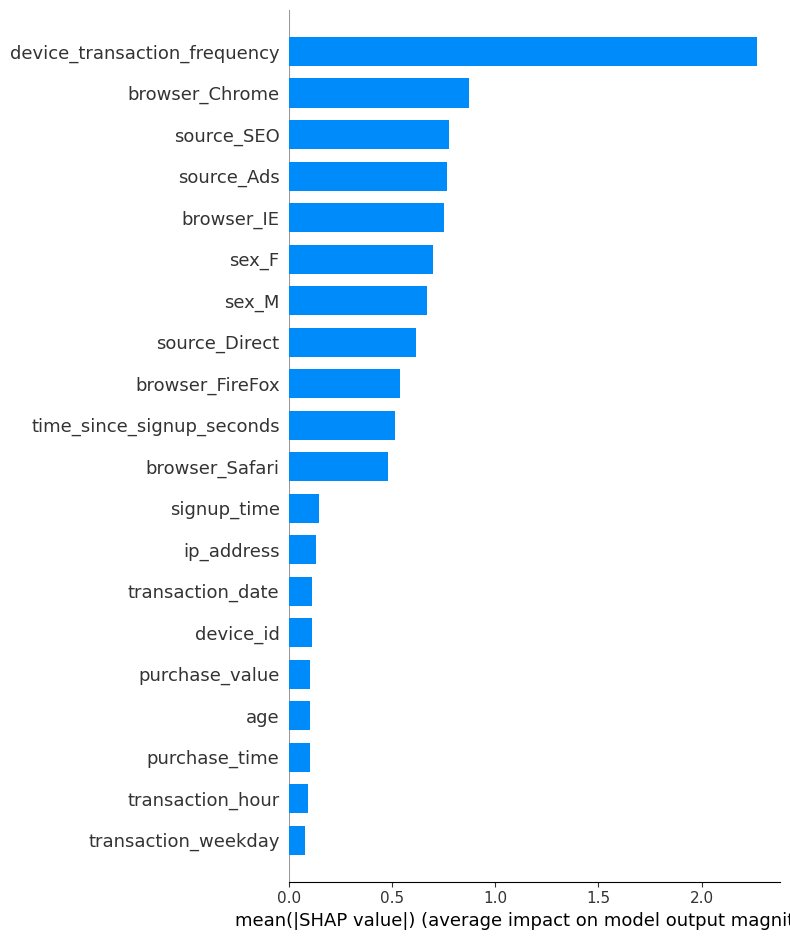

In [13]:
shap.summary_plot(shap_values_fraud, X_test_fraud, feature_names=X_test_fraud.columns, plot_type='bar')

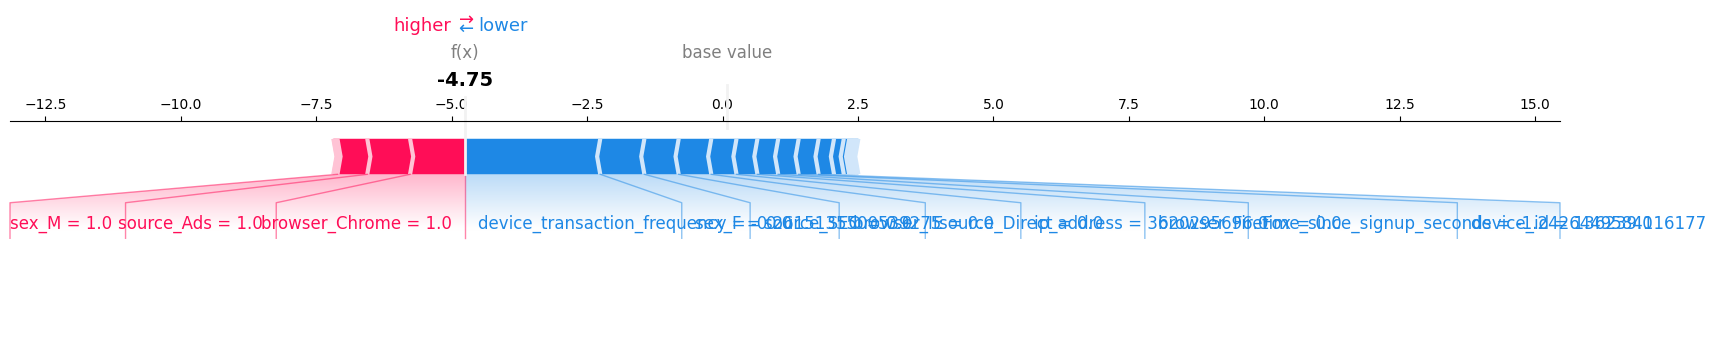

In [14]:
# Force plot
shap.initjs()
shap.force_plot(explainer_fraud.expected_value, shap_values_fraud[0], X_test_fraud.iloc[0,:], matplotlib=True)

## SHAP Analysis for Credit Card Model

In [15]:
explainer_credit = shap.TreeExplainer(xgb_credit)
shap_values_credit = explainer_credit.shap_values(X_test_credit)

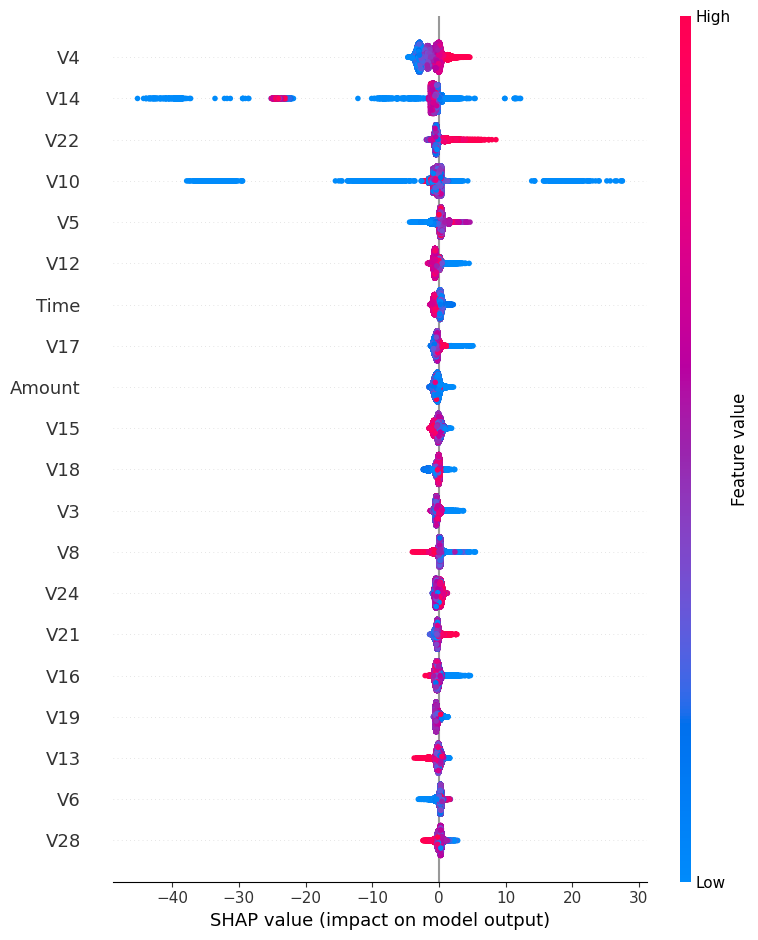

In [16]:
shap.summary_plot(shap_values_credit, X_test_credit, feature_names=X_test_credit.columns)

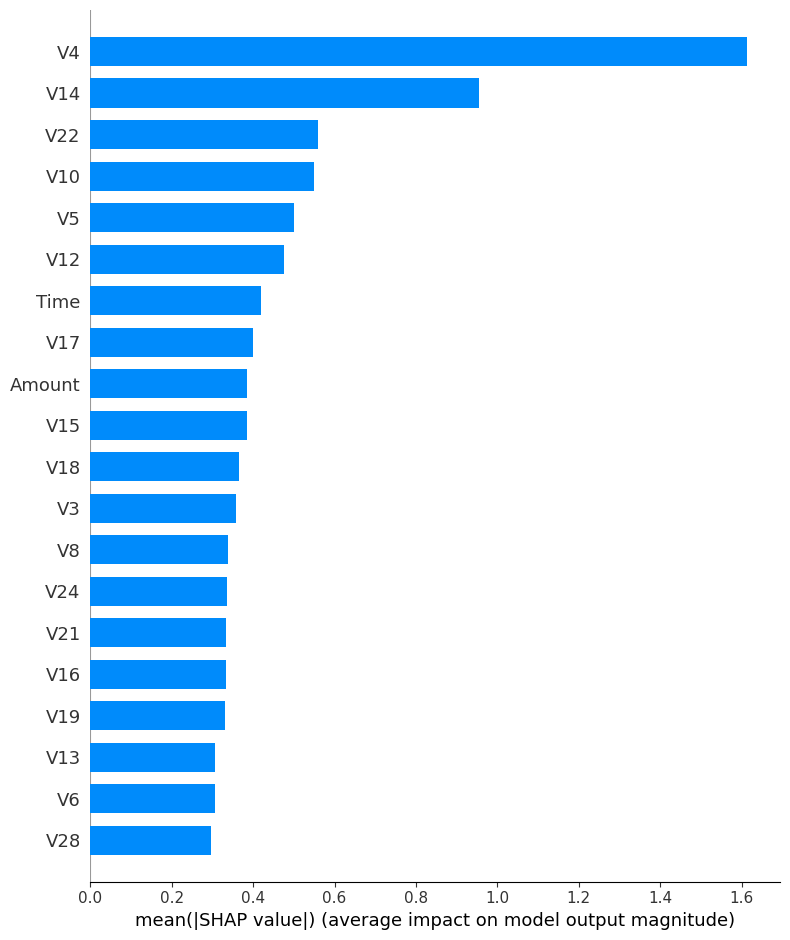

In [17]:
shap.summary_plot(shap_values_credit, X_test_credit, feature_names=X_test_credit.columns, plot_type='bar')

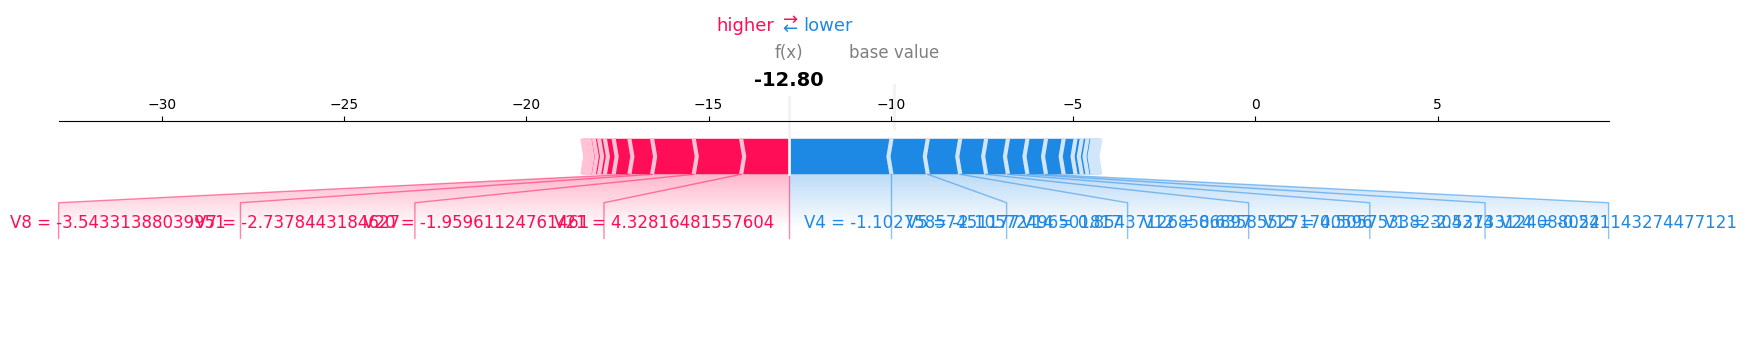

In [18]:
shap.force_plot(explainer_credit.expected_value, shap_values_credit[0], X_test_credit.iloc[0,:], matplotlib=True)